Height Generation

In [8]:
import numpy as np

points = 7
angles = np.linspace(0, 2*np.pi, points)
print(angles)
size = 3612
#dest = 'npHeightMatrix'
dest = 'src/drp_2025fall/npHeightMatrix/'

def heightMatrix(angle: float, size: int, scale = 1) -> np.ndarray:
        heightMatrix = np.zeros((size, size), np.float32)
        step = scale/size
        for i in range(size):
            for j in range(size):
                heightMatrix[i, j] = np.sin(angle)*((size-i-1)*step) + np.cos(angle)*(j*step)
        return heightMatrix

index = 0
np.save(dest+'/angles.npy',angles)
#np.save('src/drp_2025fall/npHeightMatrix/angles.npy', angles)
for angle in angles:
    print(angle)
    hM = heightMatrix(angle, size, scale=1)
    np.save(dest+'/HeightMatrix_sz%s_ag%s.npy'%(size,index), hM)
    index += 1

[0.         1.04719755 2.0943951  3.14159265 4.1887902  5.23598776
 6.28318531]
0.0
1.0471975511965976
2.0943951023931953
3.141592653589793
4.1887902047863905
5.235987755982988
6.283185307179586


Raster Multiplication

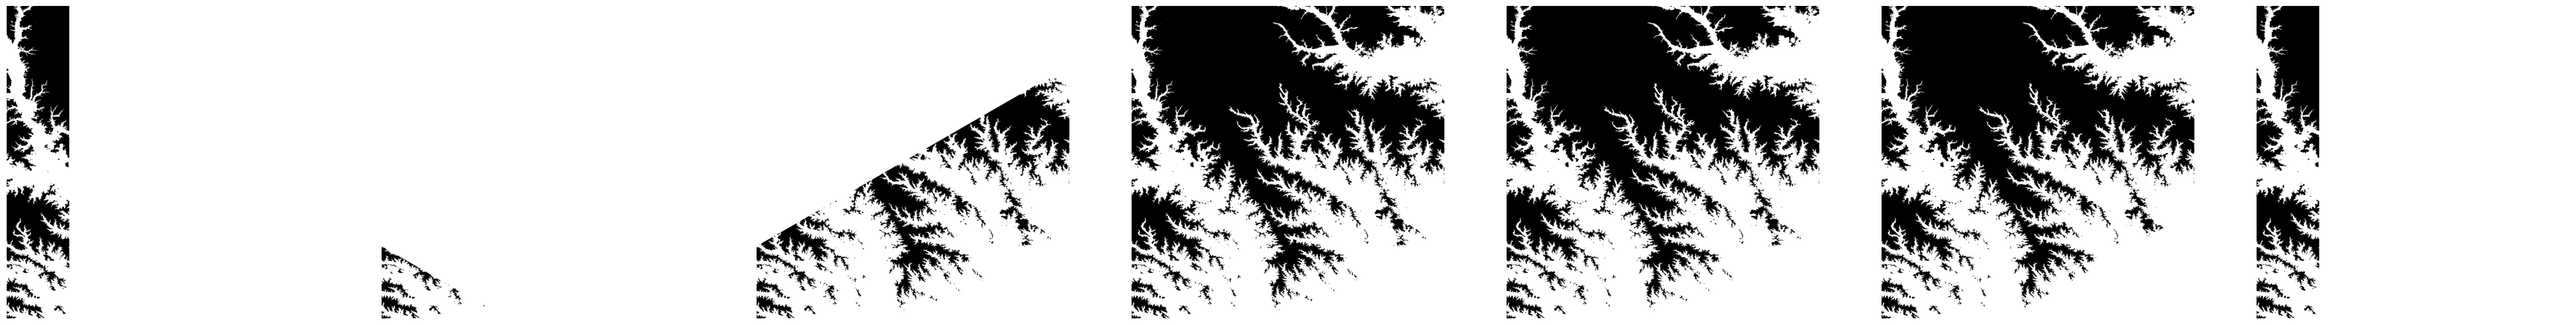

In [65]:
import rasterio
import os
import matplotlib.pyplot as plt

data_set_location = "/rasterDataset"
currentDirectory = os.getcwd()

def list_folders_in_directory(directory_path):
    folders = []
    try:
        # Get all entries in the directory
        all_entries = os.listdir(directory_path)

        # Filter for directories
        for entry in all_entries:
            full_path = os.path.join(directory_path, entry)
            if os.path.isdir(full_path):
                folders.append(entry)
    except FileNotFoundError:
        print(f"Error: Directory '{directory_path}' not found.")
    except Exception as e:
        print(f"An error occurred: {e}")
    return folders

fig, axes = plt.subplots(1, points, figsize=(50, 35))

classifications = list_folders_in_directory(currentDirectory+data_set_location)
for classification in classifications:
    cdw = currentDirectory+data_set_location+'/'+classification
    all_entries = os.listdir(cdw)
    for entry in all_entries:
        with rasterio.open(cdw+'/'+entry) as src:
            image_data = src.read()
            profile = src.profile
            meanPixel_value = image_data.mean()
            thresholdData = np.round(image_data > meanPixel_value).reshape((3612,3612))
            heightMatirces = os.listdir(currentDirectory+'/'+dest)
            heightMatirces.sort()
            for i in range(points):
                HM = np.load(currentDirectory+'/'+dest+'/'+heightMatirces[i])
                PersIM = thresholdData * HM
                PersIM[PersIM == 0] = float('inf')
                sublevel_a = np.round(PersIM > .2).reshape((3612,3612))
                axes[i].imshow(sublevel_a, cmap='grey')
                axes[i].axis('off')
plt.show()


